# Load libraries

In [13]:
from datetime import datetime
import re
import numpy as np
import pandas as pd
import os

# Specify git executable file for GitPython in Jupyter Notebook (In IDE, it can still work without this line.)
os.environ["GIT_PYTHON_GIT_EXECUTABLE"] = "C:\Program Files\Git\cmd\git.exe"

import git
from git import RemoteProgress

from git import Repo
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Clone repo from GitHub

Link: https://git-scm.com/docs/git-clone <br>
<b>Note:</b> In case too-long file path issue occurs in Windows, set <code>git config --system core.longpaths true</code>

In [14]:
class Progress(RemoteProgress):
    def update(self, op_code, cur_count, max_count=None, message=''):
        print(self._cur_line)

In [15]:
#remote_link = ""
local_link = "C:\\Users\\subu1\\Desktop\\SSE-EX2\\wildfly-core"
# Uncomment to clone
# Repo.clone_from(remote_link, local_link, progress=Progress())

In [16]:
repo = Repo(local_link)
fixing_commit ="40996ae6d5d3b6c1602a15f96b86a8d8a39b53eb"
affected_file = "deployment-repository/src/main/java/org/jboss/as/repository/PathUtil.java"

# Show info of a commit
Link: https://git-scm.com/docs/git-show
You can explore different parameters.

In [17]:
show_data = repo.git.show("-s", fixing_commit).splitlines()
for line in show_data:
    print(line)

commit 40996ae6d5d3b6c1602a15f96b86a8d8a39b53eb
Author: Emmanuel Hugonnet <ehugonne@redhat.com>
Date:   Wed Jun 20 09:29:02 2018 +0200

    [WFCORE-3938]: Checking target paths when unzipping deployements.


# Total Files

In [19]:
total_files = repo.git.show("--stat",fixing_commit).splitlines()
print("Total Files Affected")
total_files=total_files[6:]
for line in total_files:
    print(line)

Total Files Affected
 .../src/main/java/org/jboss/as/repository/PathUtil.java               | 4 ++--
 1 file changed, 2 insertions(+), 2 deletions(-)


# Total Directories

In [20]:
total_directories_affect = repo.git.show("--dirstat",fixing_commit).splitlines()
print("Total Directories Affected")
total_directories_affect = total_directories_affect[6:]
for line in total_directories_affect:
    print(line)

Total Directories Affected
 100.0% deployment-repository/src/main/java/org/jboss/as/repository/


# Total Lines of codes deleted

In [21]:
total_line_del = repo.git.show("--shortstat",fixing_commit).splitlines()
total_line_del.reverse()
total_line_del = total_line_del[0].split(',')
print("Total Number of lines of codes Deleted(including blank spaces):"+total_line_del[2])

Total Number of lines of codes Deleted(including blank spaces): 2 deletions(-)


# Total lines of codes added(including blank spaces)

In [22]:
total_line_add = repo.git.show("--shortstat",fixing_commit).splitlines()
total_line_add.reverse()
total_line_add = total_line_add[0].split(',')
print("Total Number of lines of codes Deleted(including blank spaces):"+total_line_add[1])

Total Number of lines of codes Deleted(including blank spaces): 2 insertions(+)


# Total Lines of codes deleted(excluding blank spaces)

In [23]:
show_del_line = repo.git.show("-U0","--pretty=""",fixing_commit).splitlines()
tot_del = 0
for line in show_del_line:
    if re.search("^\-",line):
        l = line.split(" ")
        if(len(l) > 1):
            if(len(l[0]) == 1):
                if(l[1][:1] != '*' or l[1][:1] != '/'):
                    tot_del +=1
                    
                    
                    
print("Total lines Deleted (Excluding comments and blank line)="+str(tot_del))

Total lines Deleted (Excluding comments and blank line)=2


# Total Lines of codes added(excluding blank spaces)

In [24]:
show_add_line = repo.git.show("-U0","--pretty=""",fixing_commit).splitlines()
tot_add = 0
for line in show_add_line:
    if re.search("^\+",line):
        l = line.split(" ")
        if(len(l) > 1):
            if(len(l[0]) == 1):
                if(l[1][:1] != '*' or l[1][:1] != '/'):
                    tot_add +=1
                    
                    
                    
print("Total lines Added (Excluding comments and blank line)="+str(tot_add))
            

Total lines Added (Excluding comments and blank line)=2


# Days between the current fixing commit and the previous commit of each affected file

In [26]:
day_diff = repo.git.log("-2","--format=%cd",fixing_commit,"--",affected_file).splitlines()
d1 = datetime.strptime(day_diff[0],"%a %b %d %X %Y %z")
d2 = datetime.strptime(day_diff[1],"%a %b %d %X %Y %z")
daydifference=(abs(d1-d2).days)
print("Days between the current fixing commit and the previous commit of each affected file:"+str(daydifference))

Days between the current fixing commit and the previous commit of each affected file:493


# How many time has each affected file of the current fixing commit been modified in the past since their creation 

In [27]:
show_times = repo.git.log("--follow","--format=%cd",fixing_commit,"--",affected_file).splitlines()
print(len(show_times))

9


# Which developers have modified each affected file since its creation 

In [28]:
show_name = repo.git.log("--follow","--format=%an",fixing_commit,"--",affected_file).splitlines()
deve=set(show_name)
print(deve)

{'Brian Stansberry', 'Emmanuel Hugonnet', 'Tomaz Cerar'}


# No of commits each developer have submitted

In [29]:
deve_commits = repo.git.shortlog("-ns","--all","--no-merges",fixing_commit,"--",affected_file).splitlines()
for line in deve_commits:
    print(line)

     7	Emmanuel Hugonnet
     1	Brian Stansberry
     1	Tomaz Cerar


# Show all developers across all branches
Link: https://git-scm.com/docs/git-shortlog

In [30]:
commit_authors = repo.git.shortlog("-sne", "--all").splitlines()

author_commits = []

for commit_author in commit_authors:
    commit, author = commit_author.split("\t")
    author_commits.append([int(commit), author])

In [64]:
df = pd.DataFrame(author_commits, columns=['Commit', 'Author'])

In [65]:
df.head()

,Commit,Author
0,1777,rpopma <rpopma@apache.org>
1,1464,Gary D. Gregory <ggregory@apache.org>
2,1266,Gary Gregory <garydgregory@gmail.com>
3,1165,Gary Gregory <ggregory@apache.org>
4,1102,Ralph Goers <rgoers@apache.org>


## Top 10 most active developers in the project

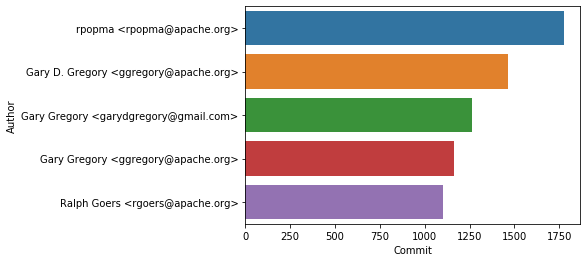

In [61]:
sns.barplot(y='Author', x="Commit", data=df[:5])

# Code changes between 2 commits
<b>Note:</b> Watch out for the initial commit (no parent commit)

In [11]:
diff_data = repo.git.diff(fixing_commit + "^", fixing_commit).splitlines()
for line in diff_data:
    print(line)

diff --git a/log4j-core/src/main/java/org/apache/logging/log4j/core/net/server/AbstractSocketServer.java b/log4j-core/src/main/java/org/apache/logging/log4j/core/net/server/AbstractSocketServer.java
index 98366946b..923d3f454 100644
--- a/log4j-core/src/main/java/org/apache/logging/log4j/core/net/server/AbstractSocketServer.java
+++ b/log4j-core/src/main/java/org/apache/logging/log4j/core/net/server/AbstractSocketServer.java
@@ -26,6 +26,8 @@ import java.io.InputStreamReader;
 import java.net.InetAddress;
 import java.net.URI;
 import java.net.URL;
+import java.util.Collections;
+import java.util.List;
 import java.util.Objects;
 
 import com.beust.jcommander.Parameter;
@@ -70,6 +72,9 @@ public abstract class AbstractSocketServer<T extends InputStream> extends LogEve
                 "-a" }, converter = InetAddressConverter.class, description = "Server socket local bind address.")
         private InetAddress localBindAddress;
 
+        @Parameter(names = {"--classes", "-C"}, descript

# Identify the last commit that changes a line modified in the current commit

Link: https://git-scm.com/docs/git-blame

In [12]:
blame_data = repo.git.blame("-L113,+1", fixing_commit + "^", "--", affected_file).splitlines()
for line in blame_data:
    print(line)

a9088defe3 (Gary D. Gregory 2014-05-22 01:32:38 +0000 113)      *        the port to listen


# Show all the commit history between two commits

Link: https://git-scm.com/docs/git-log <br> Watch out for initial commit (no parent commit)

In [13]:
last_commit = blame_data[0].strip().split()[0]
log_data = repo.git.log("--oneline", last_commit + ".." + fixing_commit + "^").splitlines()
print("Number of commits in between:", len(log_data))

Number of commits in between: 6363


In [14]:
log_data

['5aff929bb [LOG4J2-1856] Update Jackson from 2.8.6 to 2.8.7.',
 'bd16bfe48 [LOG4J2-1856] Update Jackson from 2.8.6 to 2.8.7.',
 '03e9743e8 [LOG4J2-1853]',
 '30afee107 Fix typo',
 'c822338da LOG4J2-1849 Fixed daylight savings time issue with FixedDateFormat.',
 '67c18b0cc Fix YamlLayout Javadoc',
 '7091591ae [LOG4J2-1850]: Fix Cassandra unit tests on Windows',
 '4e1f798cc Add changelog entry for LOG4J2-1753',
 '07e91be6b [LOG4J2-1848]: Add JSON encoding support to %enc',
 'bbe03e3e4 Fix docs regarding %enc{\\n}',
 'c93c0270e Add changelog entry for LOG4J2-1843',
 "40f60b738 Merge commit 'refs/pull/63/head' of https://github.com/apache/logging-log4j2",
 'a11150e51 Fix name in changelog',
 '1e7dbd579 Add changelog entry for LOG4J2-1840',
 "fd4ab9501 Merge commit 'refs/pull/65/head' of https://github.com/apache/logging-log4j2",
 'f81feeeea LOG4J2-1845 Handle when LogEvent.getLoggerName() returns null in KafkaAppender',
 'e418c39b5 LOG4J2-1845 Handle when LogEvent.getLoggerName() returns n